# **PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões**


Testing kNN with adult database from UCI repository.

**Author**: Pedro Henrique Resnitzky Barbedo

**nUSP**: 14657691

**Hash**: 93

# **1. Imports**

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler

# **2. Loading Dataset**

In [34]:
train = pd.read_csv("./kaggle/input/adult-pmr3508/train_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

test = pd.read_csv("./kaggle/input/adult-pmr3508/test_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

In [35]:
train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [36]:
test.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


# **3. Data Description**



*   Data Types
*   Check Missing Values
*   Fill Missing Values


**3.1. Data Types**

In [37]:
train.dtypes

Id                 int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Here we see that quantitative variables are of type "int64" and qualitative variables are of type "object"

**3.2. Check Missing Values**

In [38]:
train.isna().sum()

Id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [39]:
test.isna().sum()

Id                  0
age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
dtype: int64

Now, as we know that there are many missing data in workclass, occupation and native.contry, we can think about a way to process it

**3.3. Fill Missing Values**

**Workclass and Occupation:**

In [40]:
# verifying the value that appears the most at each variable
occupation_mode = train.loc[:, 'occupation'].mode()[0]
workclass_mode = train.loc[:, 'workclass'].mode()[0]

# filling missing values
train.loc[:, 'occupation'].fillna(occupation_mode, inplace = True)
train.loc[:, 'workclass'].fillna(workclass_mode, inplace = True)
test.loc[:, 'occupation'].fillna(occupation_mode, inplace = True)
test.loc[:, 'workclass'].fillna(workclass_mode, inplace = True)

**Native Country:**

In [41]:
# group by native.country values and calculate its size
native_country_values = train.groupby('native.country').size()

native_country_values

native.country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua                        34
Outlying-US(G

Since most part of the native.country data is filled as "Unites-States" and others have diversified data, we may drop the "native.country" column

Since we'll drop this column, let's take the opportunity to drop the Id aswell

In [42]:
removed_columns = ['native.country', 'Id']

train.drop(columns=removed_columns , inplace=True, axis=1)
test.drop(columns=removed_columns , inplace=True, axis=1)

Now we check if our work was well done!

In [43]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

In [44]:
test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

# **4. Statistical Analysis**



*   Seeking for Outliers
*   Seeking for Correlation



**4.1. Seeking for Outliers**

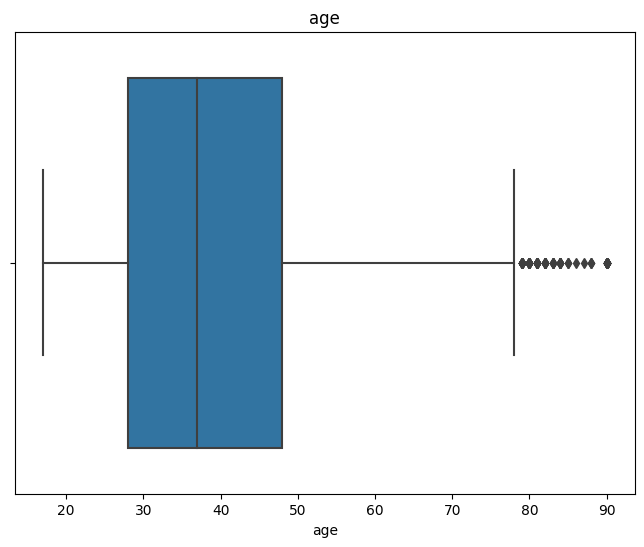

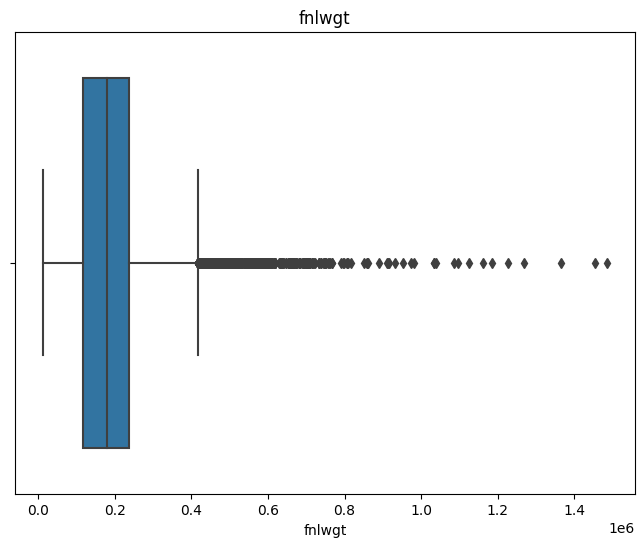

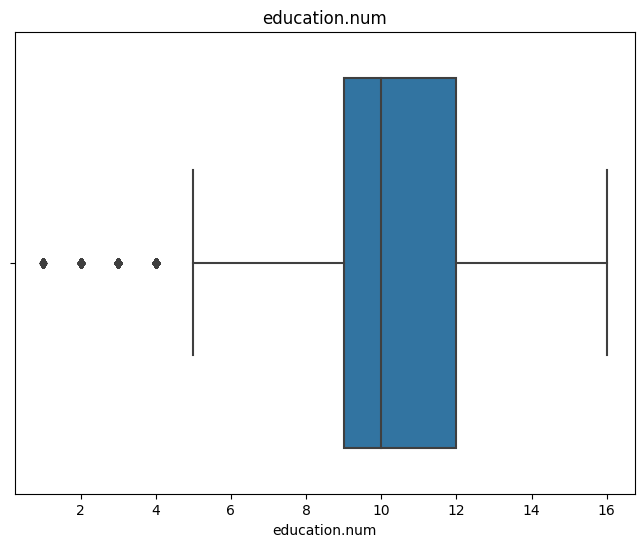

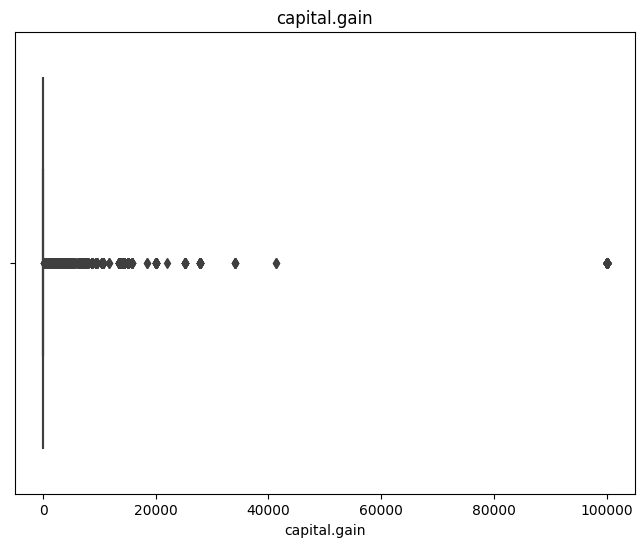

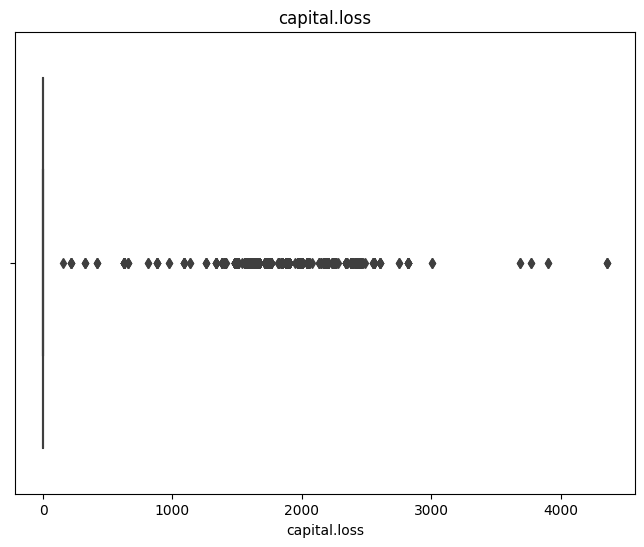

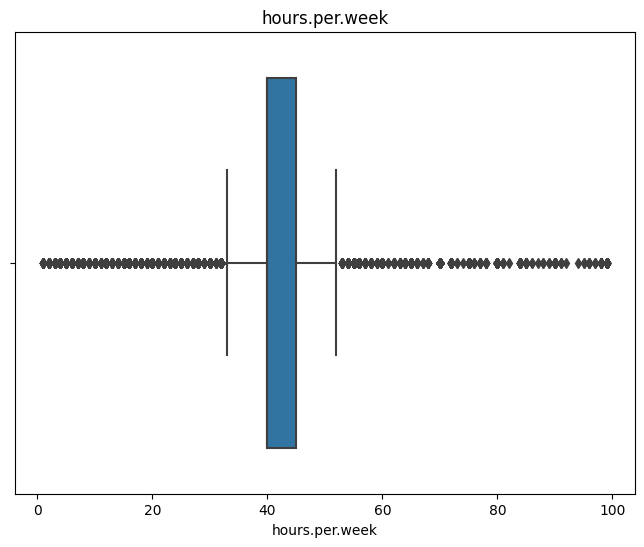

In [45]:
numeric_columns = train.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    sns.boxplot(x=train[col])
    plt.title(col)
    plt.show()

As we see, "fnlwgt", "capital.gain" and "capital.loss" are the main variables we should look for when talking about outliers, but let's leave it aside for now

**4.2. Seeking for Correlation**

In [46]:
# creating an alternative dataframe where income is represented as binary
train_alt = train.copy()
train_alt['income'] = train_alt['income'].map({'<=50K': 0, '>50K': 1})

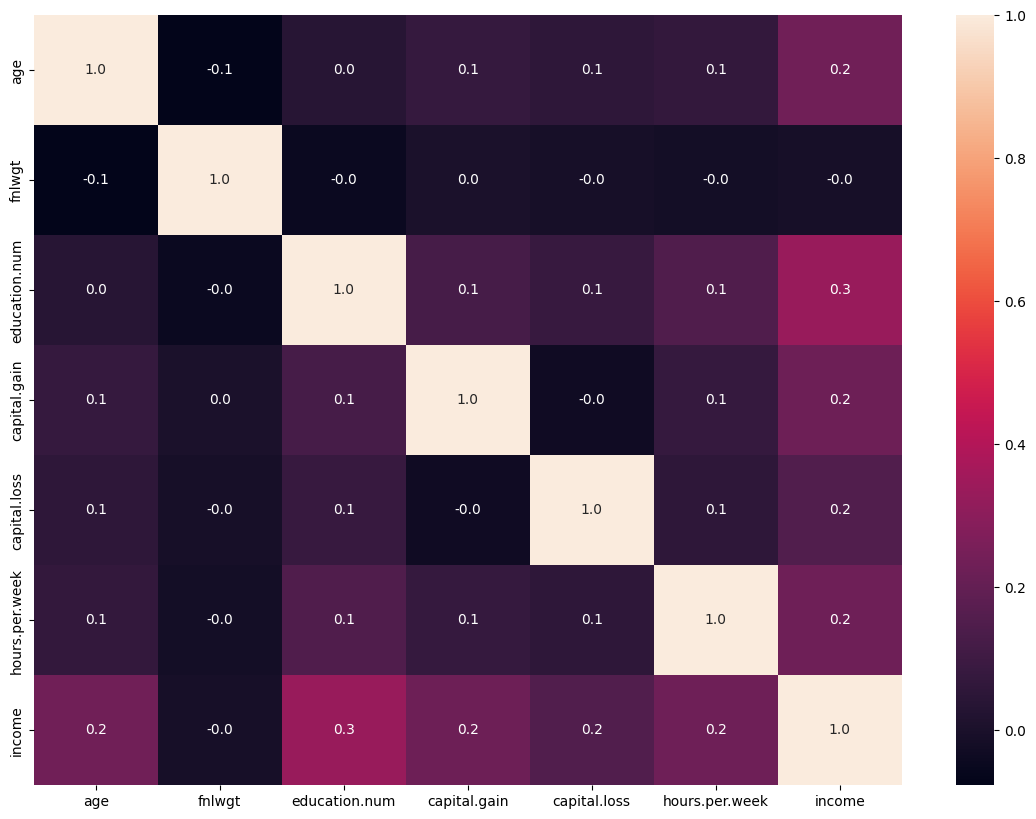

In [47]:
fig, ax = plt.subplots(figsize=(14, 10), dpi=100)

corr = train_alt.corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.1f', ax=ax)
plt.show()

By that, we discover that all numerical variables other than "fnlwgt" are useful for our modeling, so we'll drop it from our original dataframe

In [48]:
removed_columns = ['fnlwgt']

train.drop(columns=removed_columns , inplace=True, axis=1)
test.drop(columns=removed_columns , inplace=True, axis=1)

# **5. Feature Selection**

For ethical reasons, we'll remove the columns "race" and "sex", since both shouldn't be a feature correlated to "income"

And, because we already have the variable "education.num", we'll remove "education"

In [49]:
removed_columns = ['race', 'sex', 'education']

train.drop(columns=removed_columns , inplace=True, axis=1)
test.drop(columns=removed_columns , inplace=True, axis=1)

In [50]:
train.head()

,age,workclass,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,34,Private,10,Divorced,Exec-managerial,Own-child,0,0,44,<=50K
1,58,Local-gov,6,Married-civ-spouse,Transport-moving,Husband,0,0,40,<=50K
2,25,Private,10,Never-married,Machine-op-inspct,Not-in-family,0,0,42,<=50K
3,24,Private,10,Divorced,Adm-clerical,Not-in-family,0,0,40,<=50K
4,57,Self-emp-inc,9,Married-civ-spouse,Transport-moving,Husband,5178,0,60,>50K


# **6. Data Preparation**



*   Scaling
*   One-Hot Encoding
*   Split between Train and Test
*   Define Test for Leaderboard Submission



**6.1. Scaling**

As we saw at our statistical analysis, we must process the variables "capital.gain", "capital.loss" and "hours.per.week" keeping in mind that they are full of outliers

In [51]:
scaler = StandardScaler()
rscaler = RobustScaler()

norm_columns = ['age', 'education.num', 'hours.per.week']
rob_columns = ['capital.gain', 'capital.loss']

train[norm_columns] = scaler.fit_transform(train[norm_columns])
test[norm_columns] = scaler.fit_transform(test[norm_columns])

train[rob_columns] = rscaler.fit_transform(train[rob_columns])
test[rob_columns] = rscaler.fit_transform(test[rob_columns])

In [52]:
train.head()

,age,workclass,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,-0.335886,Private,-0.031325,Divorced,Exec-managerial,Own-child,0.0,0.0,0.288524,<=50K
1,1.423589,Local-gov,-1.586131,Married-civ-spouse,Transport-moving,Husband,0.0,0.0,-0.035430,<=50K
2,-0.995689,Private,-0.031325,Never-married,Machine-op-inspct,Not-in-family,0.0,0.0,0.126547,<=50K
3,-1.069001,Private,-0.031325,Divorced,Adm-clerical,Not-in-family,0.0,0.0,-0.035430,<=50K
4,1.350277,Self-emp-inc,-0.420027,Married-civ-spouse,Transport-moving,Husband,5178.0,0.0,1.584340,>50K


**6.2. One-Hot Encoding**

We'll use One-Hot for nominal qualitative data

In [53]:
onehot_columns = ['workclass', 'marital.status', 'occupation', 'relationship']


train = pd.get_dummies(train, columns = onehot_columns)
test = pd.get_dummies(test, columns = onehot_columns)

In [54]:
train.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,-0.335886,-0.031325,0.0,0.0,0.288524,<=50K,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1.423589,-1.586131,0.0,0.0,-0.035430,<=50K,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,-0.995689,-0.031325,0.0,0.0,0.126547,<=50K,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,-1.069001,-0.031325,0.0,0.0,-0.035430,<=50K,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1.350277,-0.420027,5178.0,0.0,1.584340,>50K,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


**6.3. Split between Train and Test**

In [55]:
X = train.drop(columns = ['income'])
y = train['income'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**6.4. Define Test for Leaderboard Submission**

In [56]:
X_submission = test.copy()

# **7. Modeling**



*   Hyperparameter Tuning and Training



**7.1. Hyperparameter Tuning and Training**

In [57]:
knn = KNeighborsClassifier()

parameters = {'n_neighbors' : np.arange(5, 31, 2)}
best_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=10)

best_knn.fit(X_train, y_train)

print(f'Best KNN: {best_knn.best_estimator_}')
print(f'Best Score: {best_knn.best_score_}')

y_predict = best_knn.predict(X_test)

Best KNN: KNeighborsClassifier(n_neighbors=27)
Best Score: 0.8661701619537048


# **8. Score**



*   Accuracy
*   Precision
*   Recall
*   Cross Validation Scores
*   F1 Score
*   Empirical Error Rate


**8.1. Accuracy**

In [58]:
accuracy = best_knn.score(X_test, y_test)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8739250614250614


**8.2. Precision**

In [59]:
precision = precision_score(y_test, y_predict, average='macro')

print(f'Precision: {precision}')

Precision: 0.8325870019573838


**8.3. Recall**

In [60]:
recall = recall_score(y_test, y_predict, average='macro')

print(f'Recall: {recall}')

Recall: 0.8067554665273727


**8.4. Cross Validation Scores**

In [61]:
scores = cross_val_score(best_knn, X_test, y_test, cv=10)

print(f'Scores: {scores}')

Scores: [0.85736196 0.84815951 0.85099846 0.84485407 0.86482335 0.86943164
 0.86789555 0.86635945 0.84485407 0.85099846]


**8.5. F1 Score**

In [62]:
f1 = f1_score(y_test, y_predict, average='macro')

print(f'F1 Score: {f1}')

F1 Score: 0.8183918491910529


**8.6. Empirical Error Rate**

In [63]:
emp_error = 1 - accuracy

print(f'Empirical Error Rate: {emp_error}')

Empirical Error Rate: 0.12607493857493857


# **9. Submission**

In [64]:
# use the whole train dataframe
best_knn.fit(X, y)

y_submission = best_knn.predict(X_submission)

submission = pd.DataFrame(y_submission, columns=['income'])
submission.index.name = 'Id'
submission.to_csv('submission.csv')